In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:
def my_func(x):
    return np.sin(x) * x

def der_my_func(x):
    return np.cos(x) * x + np.sin(x)

def der2_my_func(x):
    return np.cos(x) * 2 - np.sin(x) * x

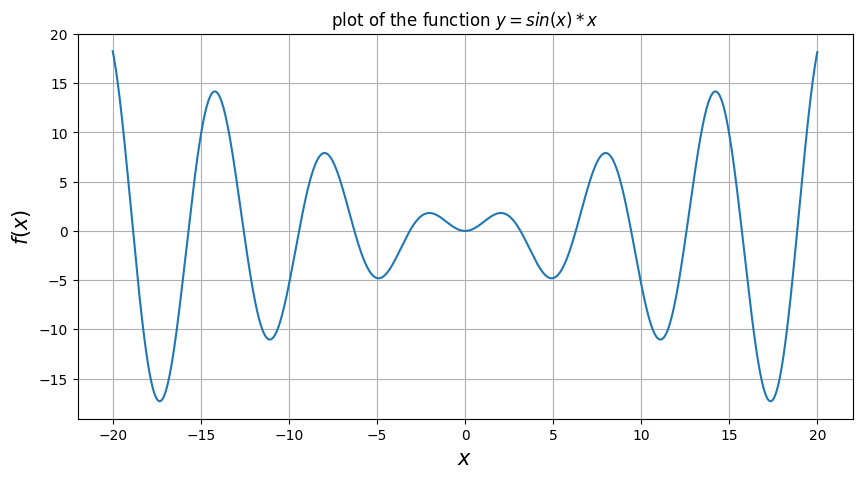

In [21]:
x = np.arange(-20, 20, 0.01)
plt.figure(figsize = (10,5))
plt.plot(x, my_func(x))
plt.title(r'plot of the function $y = sin(x) * x$')
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$f(x)$', fontsize = 15)
plt.grid(True)

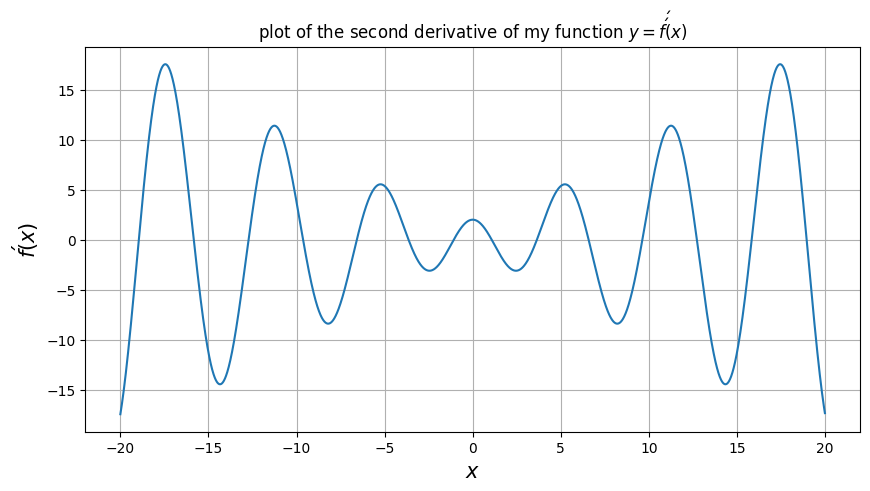

In [22]:
plt.figure(figsize = (10, 5))
plt.plot(x, der2_my_func(x))
plt.title(r'plot of the second derivative of my function $y = f\'\'(x)$')
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$f\'(x)$', fontsize = 15)
plt.grid(True)

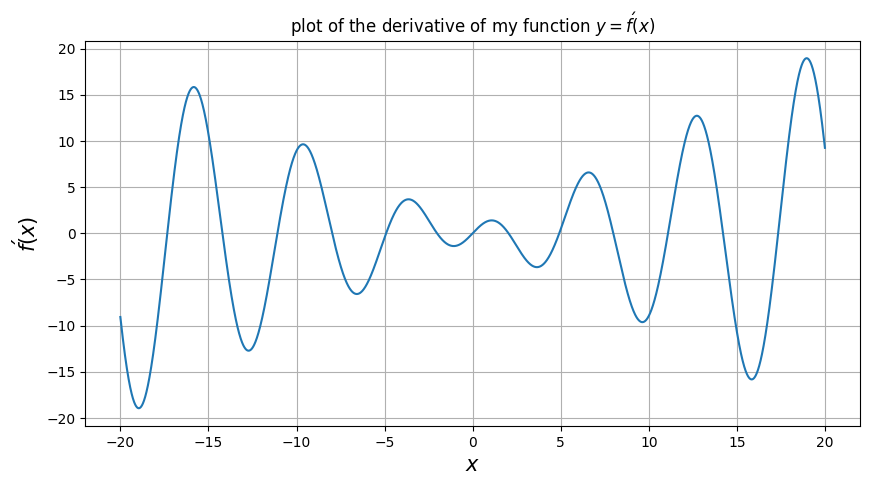

In [23]:
plt.figure(figsize = (10, 5))
plt.plot(x, der_my_func(x))
plt.title(r'plot of the derivative of my function $y = f\'(x)$')
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$f\'(x)$', fontsize = 15)
plt.grid(True)

k1 =  0.999988993082352
k2 =  1.7776741756712497


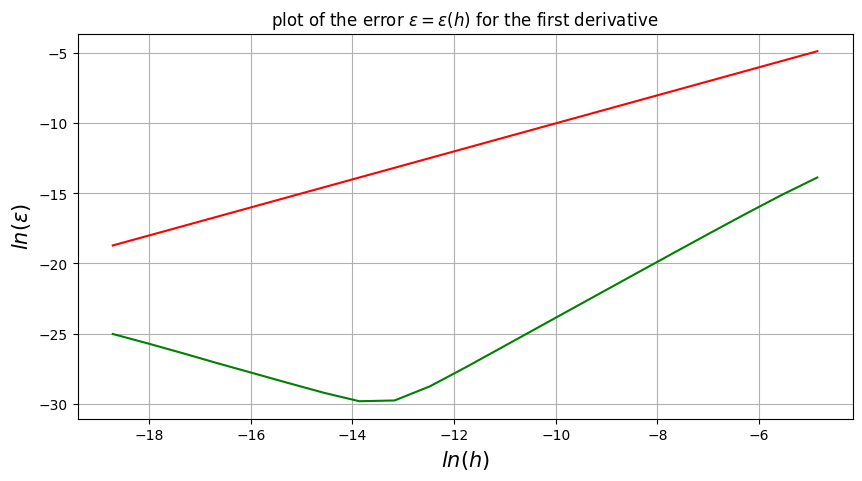

In [27]:
error_1 = []
error_2 = []
h = [1 / (2 ** i) for i in range(7, 28)]
pr_der_my_func = np.array([der_my_func(i) for i in x])

for h_i in h:
    num = int(1 / ((2 ** 4) * h_i))
    x = np.arange(- 1 / (2 ** 5), 1 / (2 ** 5), h_i)
    pr_f = np.array([my_func(i) for i in x])
    pr_der_my_func = np.array([der_my_func(i) for i in x])

    der_pr_f_1 = np.array([0.] * num)
    der_pr_f_1[0] = (pr_f[1] - pr_f[0]) / h_i
    for i in range(1, num):
        der_pr_f_1[i] = (pr_f[i] - pr_f[i - 1]) / h_i

    der_pr_f_2 = np.array([0.] * num)
    der_pr_f_2[0] = (pr_f[1] - pr_f[0]) / h_i
    der_pr_f_2[-1] = (pr_f[-1] - pr_f[-2]) / h_i
    for i in range(1, num - 1):
        der_pr_f_2[i] = (pr_f[i + 1] - pr_f[i - 1]) / (2 * h_i)
    error_1.append(max([abs(der_pr_f_1[i] - pr_der_my_func[i]) for i in range(1, len(der_pr_f_1))]))
    error_2.append(max([abs(der_pr_f_2[i] - pr_der_my_func[i]) for i in range(1, len(der_pr_f_2) - 1)]))
error_1 = np.array([np.log(i) for i in error_1])
error_2 = np.array([np.log(i) for i in error_2])
log_h = np.array([np.log(i) for i in h])

k1 = (error_1[1] - error_1[0]) / (log_h[1] - log_h[0])
k2 = (error_2[1] - error_2[0]) / (log_h[1] - log_h[0])
print("k1 = ", k1)
print("k2 = ", k2)

plt.figure(figsize = (10, 5))
plt.plot(log_h, error_1, 'r', log_h, error_2, 'g')
plt.title(r'plot of the error $\epsilon = \epsilon(h)$ for the first derivative')
plt.xlabel(r'$ln(h)$', fontsize = 15)
plt.ylabel(r'$ln(\epsilon)$', fontsize = 15)
plt.grid(True)
plt.show() 

k1 =  0.8559219550028992
k2 =  1.999788666490656


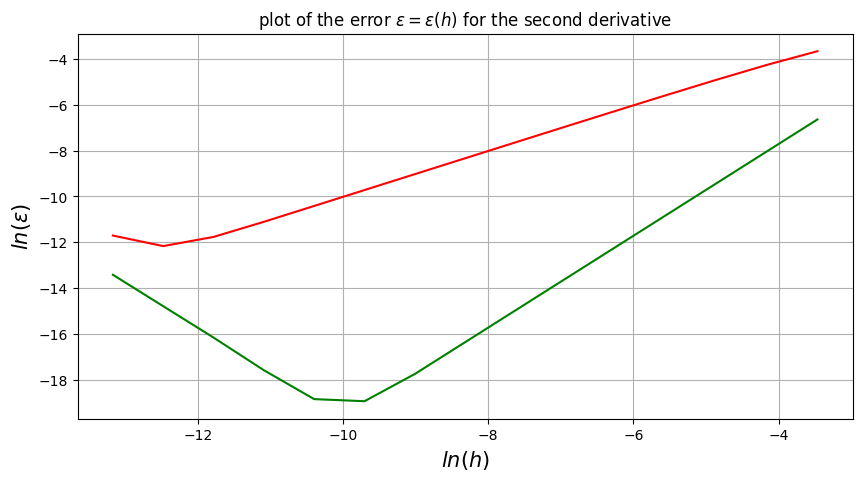

In [26]:
error_1 = []
error_2 = []
h = [1 / (2 ** i) for i in range(5, 20)]

for h_i in h:
    x = np.arange(-0.25, 0.25, h_i)
    num = int(0.5 / h_i)
    pr_f = [my_func(i) for i in x]
    pr_der2_my_func = [der2_my_func(i) for i in x]

    der2_pr_f_1 = np.array([0.] * num)
    der2_pr_f_1[0] = (pr_f[2] - 2 * pr_f[1] + pr_f[0]) / (h_i * h_i)
    der2_pr_f_1[1] = (pr_f[2] - 2 * pr_f[1] + pr_f[0]) / (h_i * h_i)
    for i in range(2, num):
        der2_pr_f_1[i] = (pr_f[i] - 2 * pr_f[i - 1] + pr_f[i - 2]) / (h_i * h_i)

    der2_pr_f_2 = np.array([0.] * num)
    der2_pr_f_2[0] = (pr_f[2] - 2 * pr_f[1] + pr_f[0]) / (2 * h_i * h_i)
    der2_pr_f_2[1] = (pr_f[3] - 3 * pr_f[1] + 2 * pr_f[0]) / (4 * h_i * h_i)
    der2_pr_f_2[-1] = (pr_f[-1] - 2 * pr_f[-2] + pr_f[-3]) / (2 * h_i * h_i)
    der2_pr_f_2[-2] = (pr_f[-3] - 3 * pr_f[-2] + 2 * pr_f[-1]) / (4 * h_i * h_i)
    for i in range(2, num - 2):
        der2_pr_f_2[i] = (pr_f[i + 2] - 2 * pr_f[i] + pr_f[i - 2]) / (4 * h_i * h_i)
    
    error_1.append(max([abs(der2_pr_f_1[i] - pr_der2_my_func[i]) for i in range(2, len(der2_pr_f_1))]))
    error_2.append(max([abs(der2_pr_f_2[i] - pr_der2_my_func[i]) for i in range(2, len(der2_pr_f_2) - 2)]))

error_1 = np.array([np.log(i) for i in error_1])
error_2 = np.array([np.log(i) for i in error_2])
log_h = np.array([np.log(i) for i in h])

k1 = (error_1[1] - error_1[0]) / (log_h[1] - log_h[0])
k2 = (error_2[1] - error_2[0]) / (log_h[1] - log_h[0])
print("k1 = ", k1)
print("k2 = ", k2)

plt.figure(figsize = (10, 5))
plt.plot(log_h, error_2, 'g', log_h, error_1, 'r')
plt.title(r'plot of the error $\epsilon = \epsilon(h)$ for the second derivative')
plt.xlabel(r'$ln(h)$', fontsize = 15)
plt.ylabel(r'$ln(\epsilon)$', fontsize = 15)
plt.grid(True)
plt.show()

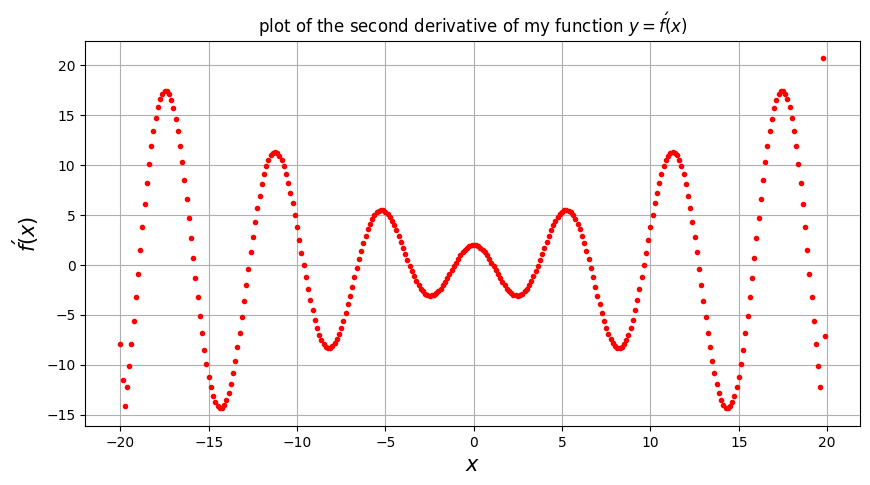

In [12]:
h_i = 1 / 8
x = np.arange(-20, 20, h_i)
num = int(40 / h_i)
pr_f = [my_func(i) for i in x]
pr_der2_my_func = [der2_my_func(i) for i in x]

der2_pr_f_2 = np.array([0.] * num)
der2_pr_f_2[0] = (pr_f[2] - 2 * pr_f[1] + pr_f[0]) / (2 * h_i * h_i)
der2_pr_f_2[1] = (pr_f[3] - 3 * pr_f[1] + 2 * pr_f[0]) / (4 * h_i * h_i)
der2_pr_f_2[-1] = (pr_f[-1] - 2 * pr_f[-2] + pr_f[-3]) / (2 * h_i * h_i)
der2_pr_f_2[-2] = (pr_f[-3] - 3 * pr_f[-2] + 2 * pr_f[-1]) / (4 * h_i * h_i)
for i in range(2, num - 2):
    der2_pr_f_2[i] = (pr_f[i + 2] - 2 * pr_f[i] + pr_f[i - 2]) / (4 * h_i * h_i)

plt.figure(figsize = (10, 5))
plt.plot(x, der2_pr_f_2, 'r.')
plt.title(r'plot of the second derivative of my function $y = f\'(x)$')
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$f\'(x)$', fontsize = 15)
plt.grid(True)